Resolvendo um problema de classificação
===================
## Dados do Curso
**Instituição:** IFES

**Curso:** Mestrado Profissional Computação Aplicada

**Professor:** Francisco de Assis Boldt

**Aluno:** Arthur Chisté Lucas

## Ambiente
**IDE:** MS Visual Studio Code

**Versão Python:** 3.8.3 64bits com anaconda 2020.07

## Introdução

Nesta tarefa, será utilizado um dataset contendo preços de casas, obtido no site Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Conforme abaixo, o dataset precisa ser baixado e armazenado no diretório **data/house_prices_dataset**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Removendo colunas com poucos dados preenchidos e preenchendo as demais com N/A e outras colunas que não serão utilizadas para esse exercício após breve análise exploratória.

In [86]:
url = 'https://github.com/arthurclucas/ReconhecimentoPadroes/blob/main/data/mobile_price_classification/train.csv?raw=true'
dados = pd.read_csv(url)
#dados = dados[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'price_range']]
# dados.fillna(dados.mean(), inplace=True)
# dados.fillna('N/A', inplace=True)
# dados.columns[dados.isna().any()].tolist()
# dados = dados.select_dtypes(include=np.number)
dados.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [87]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Transformando a coluna de preço em dados categóricos para poder fazer o Logistic Regression mais abaixo

In [83]:
# dados.head(20)dados['CategoricalSalePrice'] = pd.qcut(dados['SalePrice'], 5, labels=range(1, 6))
# dados = dados.drop('SalePrice', axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CA98B5190>,
      dtype=object)

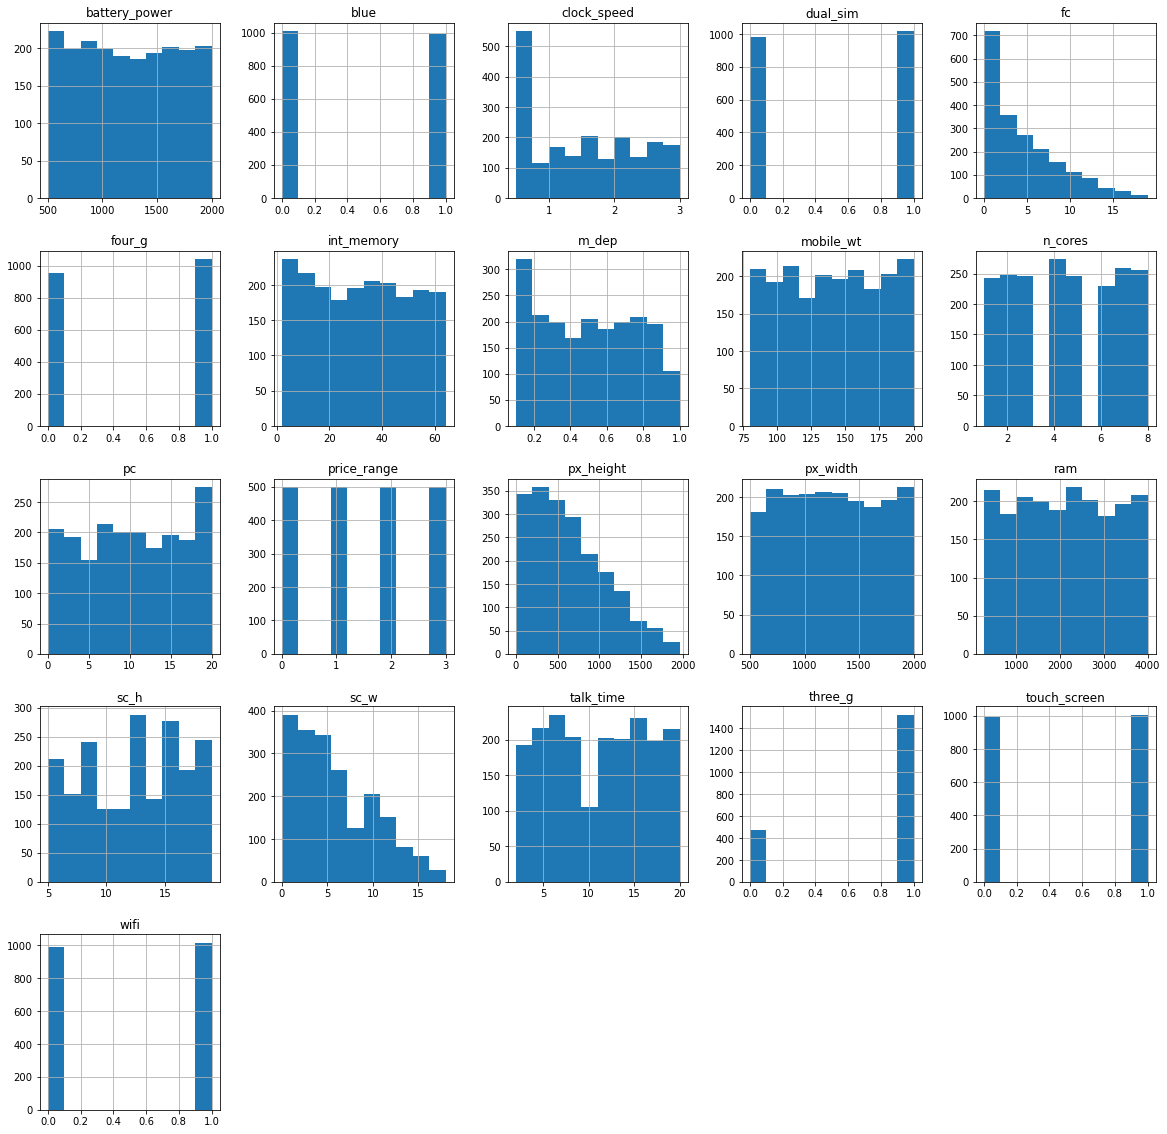

In [88]:
fig = plt.figure(figsize = (20,20))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = fig.gca()
dados.hist(ax = ax)

In [ ]:
#dados = dados[['GrLivArea', 'SalePrice']]

#Retirei essa impressão, pois estava atrapalhando a renderização pelo github, troquei pelo histograma
#for i in range(len(dados.columns) -1):
#    dados.plot.scatter(x=i, y='SalePrice')

Treina a base e colhe os resultados

In [112]:
y = dados['price_range']
X = dados.drop('price_range', axis = 1)
modelo = LogisticRegression()
modelo.fit(X, y)
yPred = modelo.predict(X)
erro = mean_squared_error(y, yPred)
acuracia = accuracy_score(y, yPred)
print(f"erro: {erro}")
print(f"acurácia: {acuracia}")
print(f"intercept_: {modelo.intercept_}")
print(f"coef_: {modelo.coef_}")
print(f"ypred: {yPred}")

erro: 0.4215
acurácia: 0.637
intercept_: [ 0.00066258  0.00018974 -0.00010506 -0.00074727]
coef_: [[-7.76769095e-04  3.33907882e-04  1.12356210e-03  3.62649550e-04
   1.76509057e-03  3.38262960e-04  1.67635145e-02  2.48209944e-04
   5.07772085e-02  3.54773983e-03  5.48084368e-03 -1.98972441e-03
   1.10904013e-03 -4.55580446e-03  8.59363626e-03  4.16304901e-03
   5.78826698e-03  4.56762934e-04  3.98585603e-04  3.56334109e-04]
 [ 1.13465804e-04  1.13473233e-04  9.81348631e-05  1.65166487e-04
   1.15478369e-03  1.25602749e-04  7.08067139e-03  1.87014076e-04
   1.28396871e-02 -3.22429309e-04  1.91386988e-03 -2.20311283e-04
   4.32622246e-04 -6.63942487e-04  2.03035234e-03  1.41499905e-04
   3.68704004e-03  1.19851930e-04  1.77825745e-04  8.67511690e-05]
 [ 3.13088190e-04 -8.16014697e-05 -1.01056655e-04 -1.45629341e-04
   2.71580310e-04 -2.25050882e-04 -8.62021170e-03 -1.07112742e-04
  -1.76950999e-02  4.26669825e-04 -1.11687786e-03  6.79306273e-04
  -4.34700485e-04  1.81696449e-03 -2.83568

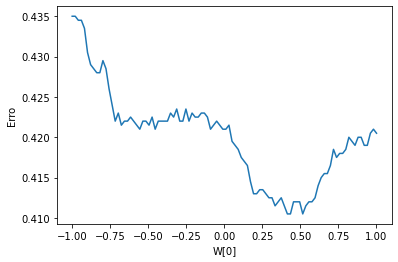

In [121]:
delta = [1, 1, 1, 1]

def plot(i):
    erros = []
    intercept = modelo.intercept_[i]
    ws = np.linspace(intercept-delta[i], intercept+delta[i], 100)
    for w in ws:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.intercept_[i] = intercept
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]")
    plt.plot(ws,erros)
    plt.show()

plot(0)

[8.97421095e-05 9.17623116e-05 9.37825136e-05 9.58027156e-05
 9.78229176e-05 9.98431196e-05 1.01863322e-04 1.03883524e-04
 1.05903726e-04 1.07923928e-04 1.09944130e-04 1.11964332e-04
 1.13984534e-04 1.16004736e-04 1.18024938e-04 1.20045140e-04
 1.22065342e-04 1.24085544e-04 1.26105746e-04 1.28125948e-04
 1.30146150e-04 1.32166352e-04 1.34186554e-04 1.36206756e-04
 1.38226958e-04 1.40247160e-04 1.42267362e-04 1.44287564e-04
 1.46307766e-04 1.48327968e-04 1.50348170e-04 1.52368372e-04
 1.54388574e-04 1.56408776e-04 1.58428978e-04 1.60449180e-04
 1.62469382e-04 1.64489584e-04 1.66509786e-04 1.68529988e-04
 1.70550190e-04 1.72570392e-04 1.74590594e-04 1.76610796e-04
 1.78630998e-04 1.80651200e-04 1.82671402e-04 1.84691604e-04
 1.86711807e-04 1.88732009e-04 1.90752211e-04 1.92772413e-04
 1.94792615e-04 1.96812817e-04 1.98833019e-04 2.00853221e-04
 2.02873423e-04 2.04893625e-04 2.06913827e-04 2.08934029e-04
 2.10954231e-04 2.12974433e-04 2.14994635e-04 2.17014837e-04
 2.19035039e-04 2.210552

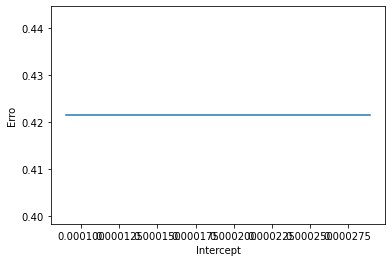

In [110]:
def plotError(modelo, i, delta):
    erros = []
    intercepts = np.linspace(modelo.intercept_[i]-delta, modelo.intercept_[i]+delta, 100)
    print(intercepts)
    intercept_ = modelo.intercept_[i]
    for w in intercepts:
        modelo.intercept_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    print(erros)
    modelo.intercept_[i] = intercept_
    plt.ylabel("Erro")
    plt.xlabel(f"Intercept")
    plt.plot(intercepts, erros)
    plt.show()

plotError(modelo, 1, 0.0001)